# Tutorial for Installation of the PoSI-GroupLASSO Repository 
# \& Replication of Simulations

## Installing Git Repo & Virtual Environment

The following tutorials requires a command line interface, e.g. Terminal on MacOS.
While the code should work in general for all python versions, python >= 3.10 is preferred.

Install [homebrew](https://brew.sh/)
1. Homebrew is required for installation of `pipx`. This requires a `sudo` command, but oftentimes on UM-affiliated computing clusters, this is not allowed for individual users. However, this step is optional as `pipx` can be safely replaced by `pip`.

If you were able to install homebrew, then install `pipx`:
1. brew install `pipx`
2. ```pipx ensurepath```
3. open new terminal (so that path changes take effect)

Use `pipx` to install virtualenv: `pipx install virtualenv`
1. Alternatively, if installation of pipx failed / is not authorized on your computer or on Great Lakes, it turns out replacing `pipx` with vanilla `pip` also works. (For Great Lakes usage, one may install on their home directory by specifying the installation with `--user`)
2. To install with `pip` on a cluster on which you don't have global installation authorization, install on your home directory using
```pip install <package> --user```
Replace `<package>` with the name of the package to be installed, e.g. `virtualenv`, `numpy`, ...

Clone the repository pertaining to your project from git:
1. Go to the repo: [SI for Group Lasso](https://github.com/yiling-h/PoSI-GroupLASSO)
2. Click on `Code`
3. Copy the https link, for the above project it would be: "https://github.com/yiling-h/PoSI-GroupLASSO.git"
4. Go to terminal and type 
```git clone https://github.com/yiling-h/PoSI-GroupLASSO.git```

cd into `selective-inference` repo

Init and populate submodules: `git submodule update --init`

Create a new python3 virtual environment: e.g., `virtualenv env3 -p python3.10`
or in general `virtualenv env3 -p python3`

Active the environment: `source env3/bin/activate`

pip will likely fail to install `regreg` from `pypi` (where it looks for packages by default) because it's missing some wheels and doesn't have a source package there). Instead, install it from git
1. ```pip install git+https://github.com/regreg/regreg.git```
2. It will look like it fail but probably didn't: it tries to build a wheel for regreg which fails, it then falls back on setup.py install but there's a deprecation warning that starting with pip 21 it won't fall back anymore.

Use pip to install the rest. 
1. "requirements.txt" is a file that contains a list of package names to be installed in one-shot. It turns out sometimes this list is not comprehensive enough for some test/simulation files. Please install additional packages as needed if you have trouble running certain codes.
2. Again, on a cluster, you may need the `--user` option whenever pip is used.

## Replicate Simulations (for Varying Sparsity)

In [5]:
from selectinf.Simulation.gaussian_simulation import comparison_gaussian_lasso_vary_s
from selectinf.Simulation.logistic_simulation import comparison_logistic_lasso_vary_s
from selectinf.Simulation.poisson_simulation import comparison_poisson_lasso_vary_s
from selectinf.Simulation.quasipoisson_simulation import (
    comparison_quasipoisson_group_lasso_vary_s)
from selectinf.Simulation.test_group_lasso_simulation import test_plotting
import warnings
warnings.filterwarnings('ignore')

### Gaussian

In [6]:
comparison_gaussian_lasso_vary_s(n=500,
                                 p=200,
                                 signal_fac=0.1,
                                 rho=0.3,
                                 level=0.90,
                                 range=range(0,10),
                                 posterior=False) # Not running posterior inference

MLE |E|: 4
Naive selection [13]
Naive |E|: 4
MLE |E|: 4
Naive selection [15]
Naive |E|: 4
MLE |E|: 12
Naive selection [5, 16, 25, 38]
Naive |E|: 16
MLE |E|: 4
Naive selection [15]
Naive |E|: 4
MLE |E|: 32


KeyboardInterrupt: 

Mean coverage rate/length:
                              coverage rate  avg length  F1 score
sparsity size method                                             
5             Data splitting       0.930357   32.266215  0.260238
              MLE                  0.883036   30.263360  0.253547
              Naive                0.803333   16.073380  0.221587
8             Data splitting       0.885000   34.063679  0.345604
              MLE                  0.857986   30.472165  0.440339
              Naive                0.776667   17.497436  0.366418
10            Data splitting       0.866250   34.402480  0.302930
              MLE                  0.881667   31.242032  0.364688
              Naive                0.779167   16.479175  0.218881


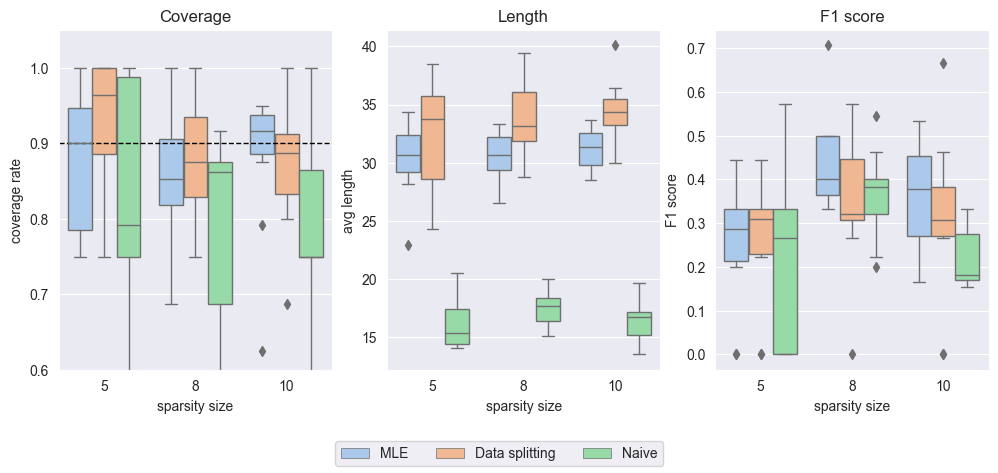

In [5]:
# Change 10 to the number of simulations you specified before
# to plot the corresponding result
test_plotting("gaussian_vary_sparsity0_10.csv")

### Logistic

In [6]:
comparison_logistic_lasso_vary_s(range=range(0,10))

Naive selection [6, 10, 18, 21, 36]
Naive selection [16, 26]
Naive selection []
Naive selection [8]
Naive selection [1, 20]
Naive selection [46]
Naive selection [8, 36]
Naive selection [22, 43]
Naive selection [10]
Naive selection [8, 18, 40]
Naive selection [4, 36]
Naive selection [13, 35]
Naive selection [18]
Naive selection [10]
Naive selection [18, 31]
Naive selection [14, 36]
Naive selection [11, 25]
Naive selection [2, 8, 21, 29]
Naive selection [5, 18, 26, 30]
Naive selection [14, 21]
Naive selection [17, 19, 46]
Naive selection [10, 12, 15, 24, 30, 31]
Naive selection [15, 33]
Naive selection [24, 31]
Naive selection [18, 27]
Naive selection [17, 20, 38]
Naive selection [6, 12, 37]
Naive selection [1]
Naive selection [3, 6, 7, 10, 15]
Naive selection [41]
Naive selection []
Naive selection []
Naive selection [16, 19, 49]
Range 0 - 10 done


Mean coverage rate/length:
                              coverage rate  avg length  F1 score
sparsity size method                                             
5             Data splitting       0.894964   32.224338  0.280854
              MLE                  0.870059   30.225682  0.296401
              Naive                0.719875   16.665012  0.264359
8             Data splitting       0.910243   33.945424  0.332770
              MLE                  0.862742   30.769949  0.353621
              Naive                0.804429   17.437175  0.334900
10            Data splitting       0.889845   34.257053  0.323025
              MLE                  0.867180   31.811154  0.360317
              Naive                0.799893   17.948799  0.341251


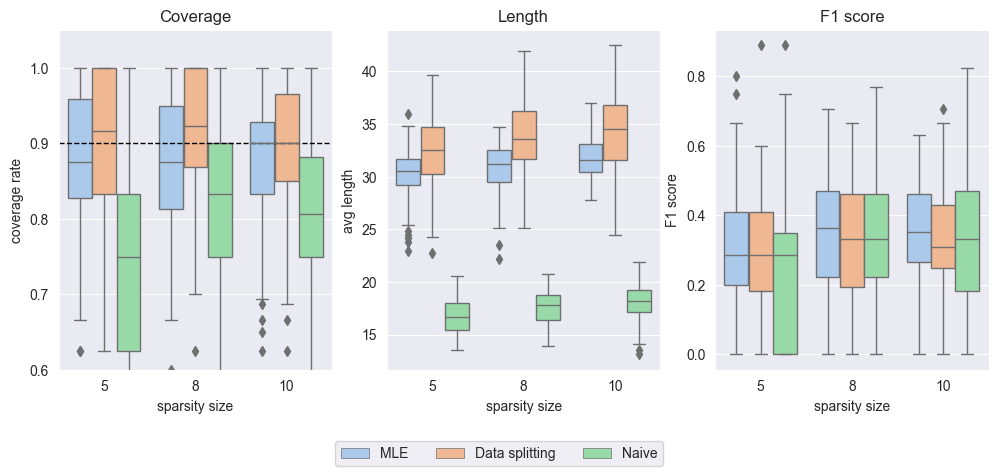

In [8]:
# Change 10 to the number of simulations you specified before
# to plot the corresponding result
test_plotting("gaussian_vary_sparsity0_100.csv")

### Poisson

In [17]:
comparison_poisson_lasso_vary_s(range=range(0,10))

Naive selection [2, 21, 25]
Naive selection [13, 15, 30, 39, 40]
Naive selection [16, 38, 43, 45]
Naive selection [6, 9, 11, 15, 21]
Naive selection [1, 12]
Naive selection [20, 22]
Naive selection [5, 49]
Naive selection [1, 4, 6, 9, 13, 17]
Naive selection [8, 12, 15, 43]
Naive selection [5, 39]
Naive selection [25, 44]
Naive selection [2, 27]
Naive selection [9, 14, 16, 45]
Naive selection [5, 11, 18]
Naive selection [1, 14, 17, 18]
Naive selection [6, 11, 17]
Naive selection [11, 14]
Naive selection [18, 28, 37]
Naive selection [5, 8, 14, 15, 16, 25, 40]
Naive selection [12, 16, 17]
Naive selection [9, 35]
Naive selection [0, 2, 12, 32, 34, 47]
Naive selection [9, 11, 16, 17, 29, 45]
Naive selection [9, 13, 38, 41, 46, 47]
Naive selection [12, 14, 16, 18, 34, 39, 47]
Naive selection [0, 8, 15, 24, 38]
Naive selection [0, 6, 9, 14, 17, 19, 24, 47]
Naive selection [12, 18, 21, 41]
Naive selection [3, 4, 15, 16, 26, 27, 28, 43]
Naive selection [9, 11, 13, 20, 42]
Range 0 - 10 done


Mean coverage rate/length:
                              coverage rate  avg length  F1 score
sparsity size method                                             
5             Data splitting       0.878571    7.455012  0.285938
              MLE                  0.911145    6.464181  0.278405
              Naive                0.746250    3.579871  0.311356
8             Data splitting       0.918274    7.594677  0.336920
              MLE                  0.856266    6.464915  0.307297
              Naive                0.811905    3.641203  0.302424
10            Data splitting       0.856941    7.684063  0.387946
              MLE                  0.838044    6.559912  0.366765
              Naive                0.744405    3.696357  0.394678


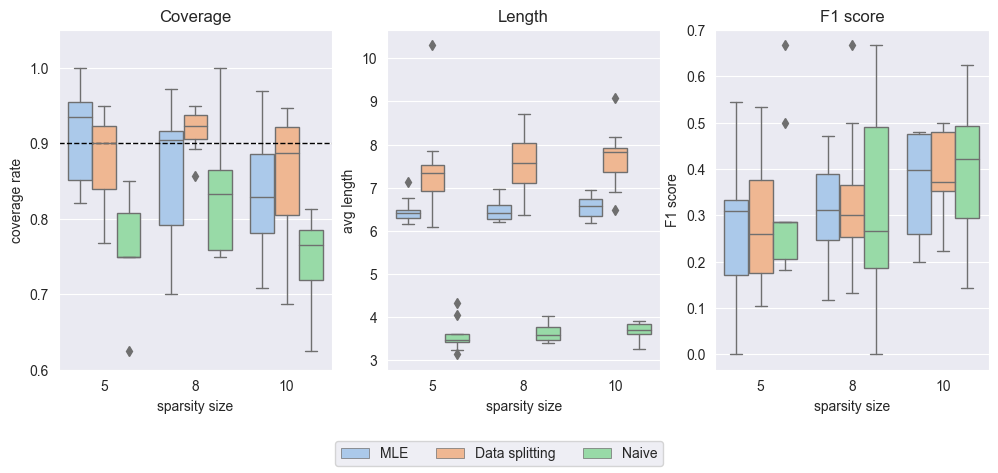

In [18]:
# Change 10 to the number of simulations you specified before
# to plot the corresponding result
test_plotting("pois_vary_sparsity0_10.csv")

### Quasi-Poisson (Negative Binomial Link)

In [19]:
comparison_quasipoisson_group_lasso_vary_s(range=range(0,10))

MLE noselection False
Data splitting noselection False
Naive noselection False
MLE noselection False
Data splitting noselection False
Naive noselection False
MLE noselection False
Data splitting noselection False
Naive noselection False
MLE noselection False
Data splitting noselection False
Naive noselection False
MLE noselection False
Data splitting noselection False
Naive noselection False
MLE noselection False
Data splitting noselection False
Naive noselection False
MLE noselection False
Data splitting noselection False
Naive noselection False
MLE noselection False
Data splitting noselection False
Naive noselection False
MLE noselection False
Data splitting noselection False
Naive noselection False
MLE noselection False
Data splitting noselection False
Naive noselection False
MLE noselection False
Data splitting noselection False
Naive noselection False
MLE noselection False
Data splitting noselection False
Naive noselection False
MLE noselection False
Data splitting noselection Fal

Mean coverage rate/length:
                              coverage rate  avg length  F1 score
sparsity size method                                             
5             Data splitting       0.889935    7.913694  0.394975
              MLE                  0.896845    6.194552  0.280031
              Naive                0.846250    4.235952  0.291284
8             Data splitting       0.871776    7.907636  0.457092
              MLE                  0.900764    6.338386  0.432803
              Naive                0.833333    4.351533  0.340606
10            Data splitting       0.898988    8.026730  0.484255
              MLE                  0.892950    6.392681  0.484886
              Naive                0.830417    4.552679  0.502817


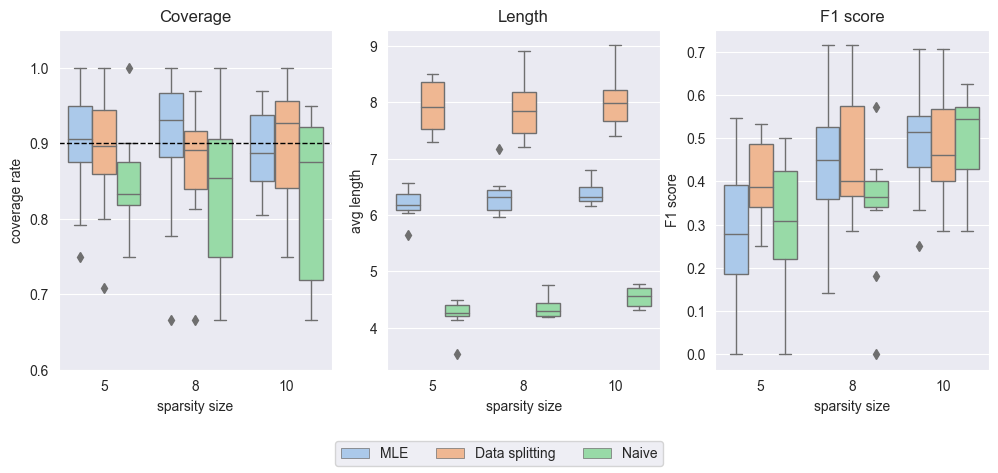

In [13]:
# Change 10 to the number of simulations you specified before
# to plot the corresponding result
test_plotting("quasipois_vary_sparsity0_10.csv")